## SVM

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from common_func import plot_decision_regions
import seaborn as sns

## 線形分離可能なデータでSVMを試す

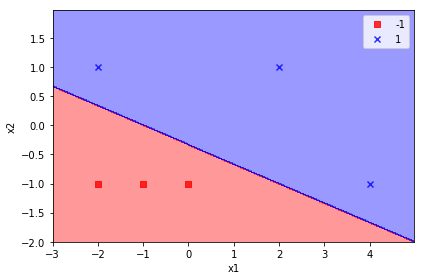

In [23]:
X = np.array([[-1, -1], [-2, -1],[0,-1],  [2, 1],[-2,1],[4,-1]])
y = np.array([-1, -1, -1, 1,1,1])

C = 10
clf = SVC(C=C,kernel="linear")
clf.fit(X, y) 

# 決定領域を描画する
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [24]:
# 線形識別関数上の値を確認する
# 線形識別関数上で0以上になるとき、y=1と判定される領域にいることになる。
# 線形識別関数上で0未満になるとき、y=-1と判定される領域にいることになる。
np.dot(X, clf.coef_.T) + clf.intercept_

array([[-1.49973333],
       [-1.99973333],
       [-0.99973333],
       [ 2.99946667],
       [ 0.99946667],
       [ 1.00026667]])

### [演習]
* Cの値をいろいろ変えて、結果がどうかわるか確認してみましょう

## 線形分離不可能なデータでSVMを試す

,label,x1,x2
0,1,0.40,0.10
1,1,0.90,0.10
2,1,0.80,0.85
3,1,0.75,0.65
4,1,0.85,0.55
5,1,0.40,0.60
6,1,0.80,0.50
7,-1,0.50,0.30
8,-1,0.28,0.45
9,-1,0.37,0.40


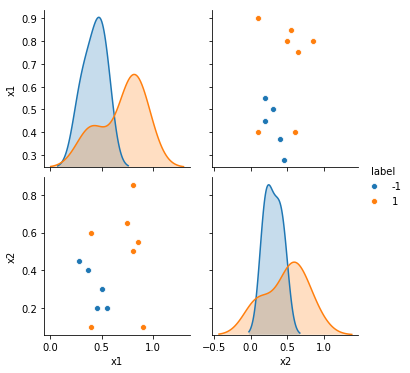

In [25]:
df_simple = pd.DataFrame({
            "label":[1,1,1,1,1,1,1,-1,-1,-1,-1,-1],
            "x1":[0.4,0.9,0.8,0.75,0.85,0.4,0.8,0.5,0.28,0.37,0.45,0.55],
            "x2":[0.1,0.1,0.85,0.65,0.55,0.6,0.5,0.3,0.45,0.4,0.2,0.2]})
display(df_simple)
sns.pairplot(df_simple, hue="label", diag_kws={'bw': 0.2})

In [26]:
# データを準備する
X_train = df_simple[["x1","x2"]].values
y_train = df_simple["label"].values
X_test = np.array([[0.6,0.35],[0.75, 0.22],[0.2,0.8],[0.25,0.2]])

# 標準化
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# SVMの実行
C = 5
clf = SVC(C=C, kernel="linear")
clf.fit(X_train, y_train)

# 未知のデータを識別する
clf.predict(X_test)

array([ 1,  1, -1, -1])

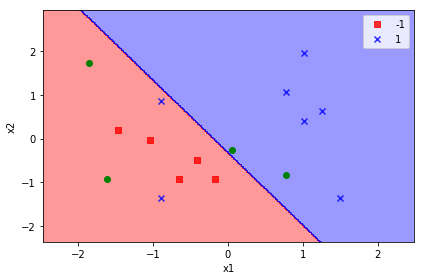

In [27]:
# 決定領域を描画する
plot_decision_regions(X_train, y_train, classifier=clf)
plt.plot(X_test[:,0],X_test[:,1], color="g", marker="o",ls="")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [28]:
# 超平面上の値を確認する
# 超平面上で0以上になるとき、y=1と判定される領域にいることになる。
# 超平面上で0未満になるとき、y=-1と判定される領域にいることになる。
np.dot(X_train, clf.coef_.T) + clf.intercept_

array([[-1.75799461],
       [ 0.99999971],
       [ 2.75708702],
       [ 1.86563794],
       [ 2.10941198],
       [-0.2188705 ],
       [ 1.67970014],
       [-0.5907461 ],
       [-1.34252637],
       [-0.9999998 ],
       [-1.17437036],
       [-0.62277149]])

### [演習]
* Cの値をいろいろ変えて、結果がどうかわるか確認してみましょう
* X_testのデータを変えて、結果がどうかわるか確認してみましょう

### カーネル関数を適応する

[-1  1  1 -1]


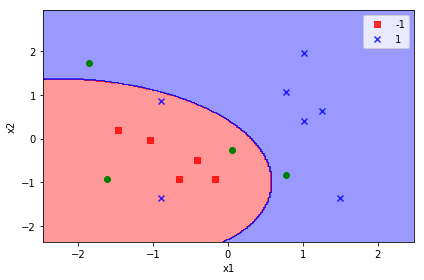

In [31]:
# SVMの実行
C = 5
kernel = "rbf"
gamma = 0.1
clf = SVC(C=C, kernel=kernel, gamma=gamma)
clf.fit(X_train, y_train)

# 未知のデータを識別する
print(clf.predict(X_test))

# 決定領域を描画する
plot_decision_regions(X_train, y_train, classifier=clf)
plt.plot(X_test[:,0],X_test[:,1], color="g", marker="o",ls="")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### [演習]
* Cの値をいろいろ変えて、結果がどうかわるか確認してみましょう
* gammaの値をいろいろ変えて、結果がどうかわるか確認してみましょう

## 最適なパラメータの探索

グリッドサーチを使い、最適な C を探してみましょう。  
scikit-learn の GridSearchCV により、簡易なインターフェイスでグリッドサーチをおこなえます。
基本となるのは、以下のようなパターンです。
```python
param = {'argument_name': ["candidate_1", "candidate_2"], ...}
model = SomeClassifier()
clf = GridSearchCV(model, param,cv=3)
clf.fit(X, y)
print(clf.best_params_, clf.best_score_)
clf.cv_results_
```


### データセット読み込み
ここでは、[Phishing WebSite Dataset](http://archive.ics.uci.edu/ml/datasets/Phishing+Websites) を利用します。  
このデータセットでは、フィッシングサイトかどうかを識別するための変数と、  
それが実際にフィッシングサイトであるかを示す Result が記録されています。  
予測対象となるラベルは Result です。

In [11]:
df = pd.read_csv("../1_data/phishing_website_dataset.csv")
print(df.columns)
print(df.shape)
df.head(20)

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')
(11055, 31)


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [12]:
X = df.iloc[:,:-1].values #ラベル列を除く
y = df["Result"].values #目的変数
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 特定の変数だけを使う。練習のため、あきらかに有効すぎる変数を除いておく
indices = list(set(range(30)) - set([7, 13]))
X_train = X_train[:, indices]
X_test = X_test[:, indices]

### [演習]
* 線形分離不可能なデータを用いて、ベストなkernel,C,gammaを探してみましょう 
* 探索するパターンを増やしすぎると、計算に時間がかかるので注意してください

In [13]:
parameters = {'kernel':['linear', 'rbf'], 'C':[1, 5]} # ここを編集する
model = SVC(gamma="scale") # gamma=scaleにすると、gammaが自動で計算される
clf = GridSearchCV(model, parameters, cv=3,)
clf.fit(X_train, y_train)
print(clf.best_params_, clf.best_score_)

{'C': 5, 'kernel': 'rbf'} 0.8955802532954251


In [14]:
# 最適パラメータを用いて識別する
clf2 = SVC(**clf.best_params_, gamma="scale") # gamma=scaleにすると、gammaが自動で計算される
clf2.fit(X_train, y_train)
print("識別精度=",clf2.score(X_test, y_test))

識別精度= 0.9050346698824239
